# ASTR 5490 Homework 3

In [40]:
# Import relevant modules/packages
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from astropy import constants as const
from astropy.timeseries import LombScargle
from PeriodicityTools import Periodicity
from LimbDarkening import LimbDarkening
from Spectra import SpectralFeatures, Accuracy
from MathTools import Gaussian, NonRelDoppler

# Reload PeriodicityTools to acknowledge changes made in the script
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 1) Exploring Radial Velocity Curve of 61 Vir b from Vogt et al. (2009)
### https://iopscience.iop.org/article/10.1088/0004-637X/708/2/1366#apj330338s2

No handles with labels found to put in legend.


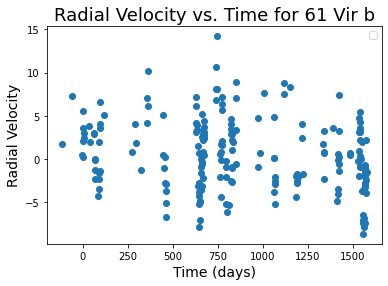

In [44]:
# Create instance of class
Virb = Periodicity('Vogt2009_61Virb_vels.dat','61 Vir b',None)

# Generate light curve for data
times,RVs,errors = Virb.LightCurve(curve='Radial Velocity')

## 1a) Make a periodogram of the whole dataset

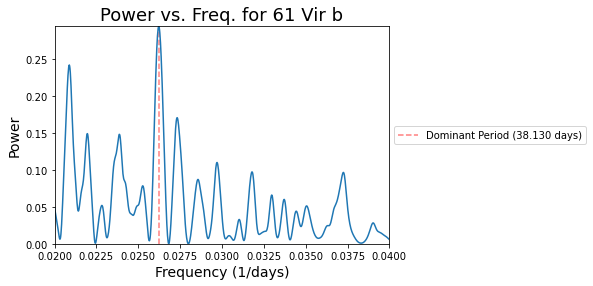

In [45]:
# Make a Lomb Scargle Periodogram of the data
original_maxPower = Virb.LS(25,50,1000,1,flux=[],plot=True)

### Looks quite similar to upper panel of Vogt et al. Figure 3, but my x-axis is the inverse of their's so mine's not exactly the same. I find the same as they do (38.13 d)

## 1b) Compute the false alarm probability considering the 38 day planet
### The F.A.P. is defined as "the fraction of trials for which the periodogram power exceeds the observed value" (Page 3 of Cumming 2004 - https://academic.oup.com/mnras/article/354/4/1165/1052087)

In [46]:
Virb.FAP(10000)

FAP = 4.141e-01


0.4141

## 1c) Fold the RV data at the period determined from the periodogram

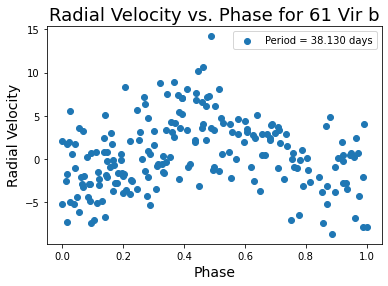

In [47]:
Virb_folded = Periodicity('Vogt2009_61Virb_vels.dat','61 Vir b',None,period=38.13)
new_times,new_RVs,new_errors = Virb_folded.LightCurve(xaxis='Phase',curve='Radial Velocity')

## 1d) Pick a ______ interval and find the FAP
### i ) contiguous 100d

In [48]:
# Find FAP over first 100 days of data
Virb_contig = Periodicity('Vogt2009_61Virb_vels.dat','61 Vir b',100,period=38.13)
Virb_contig.FAP(10000)

FAP = 4.511e-01


0.4511

### Choosing a contiguous subset of the data slightly increases the FAP. So the less data you use, the less you confident you can be in your detection

### ii) sparsed 100d

In [49]:
# Find FAP using first 50 and last 50 days of data
Virb_sparsed = Periodicity('Vogt2009_61Virb_vels.dat','61 Vir b',50,contiguous=False,period=38.13)
Virb_sparsed.FAP(10000)

FAP = 4.349e-01


0.4349

### Choosing a sparsed subset of the data also slightly increases the FAP, but less so than the contiguous subset. So if you use a subset of the data, choosing a longer time baseline improves the confidence of your detection. This seems analogous to random sampling vs. sampling at a particular frequency

# 2) Investigating Gaussian absorption lines

## 2a) Generate Gaussian absorption line for normalized spectrum with: $A=0.5$, $\sigma=1$ angs. centered at $5000$ angs. with pixels every 0.5 angs.

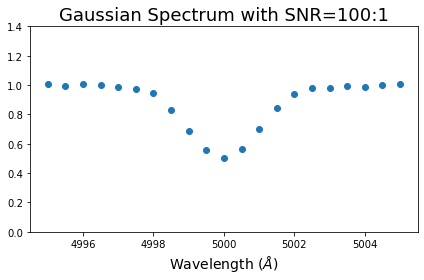

In [3]:
# Gaussian spectrium with SNR=100:1         
SNR_100 = SpectralFeatures(5000.0,1.0,0.5,0.0,1.0,0.5,100)
x,y_100 = SNR_100.GaussianNoise()

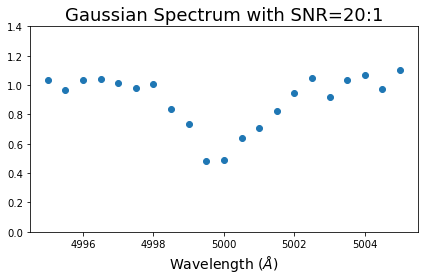

In [4]:
# Gaussian spectrium with SNR=20:1
SNR_20 = SpectralFeatures(5000.0,1.0,0.5,0.0,1.0,0.5,20)
x,y_20 = SNR_20.GaussianNoise()

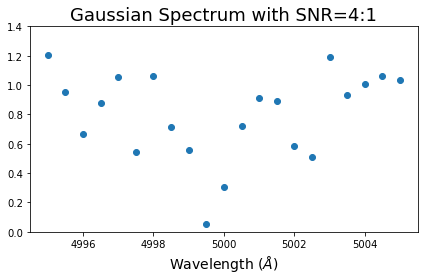

In [5]:
# Gaussian spectrium with SNR=4:1
SNR_4 = SpectralFeatures(5000.0,1.0,0.5,0.0,1.0,0.5,4)
x,y_4 = SNR_4.GaussianNoise()

## 2a) Use curve_fit to fit Gaussian to noisy data from 2a. Plot accuracy of the center of the profile (mean) vs. SNR

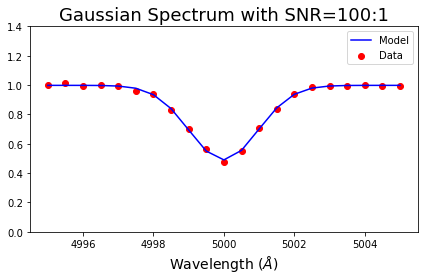

In [6]:
# Plot data vs. model for SNR = 100:1
accuracy_100 = SNR_100.GaussianModel(plot=True)

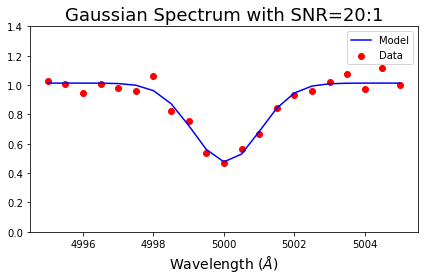

In [8]:
# Plot data vs. model for SNR = 20:1
accuracy_20 = SNR_20.GaussianModel(plot=True)

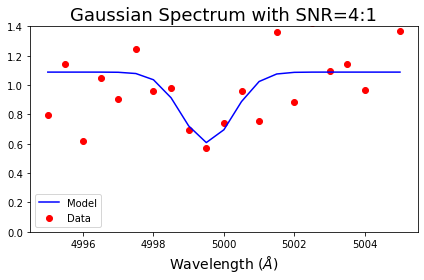

In [10]:
# Plot data vs. model for SNR = 4:1
accuracy_4 = SNR_4.GaussianModel(plot=True)

10 out of 490 trials had accuracy > 1


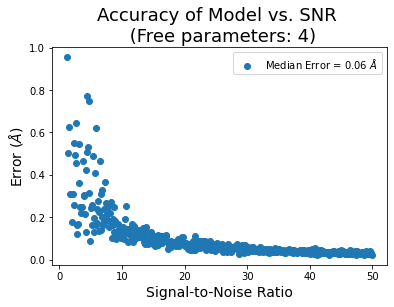

In [48]:
# Make list of SNRs and empty list of accuracies
SNRs = np.arange(1,50,.1)
Accuracy(4,SNRs)

## 2c) Repeat 2b for the mean being the only free parameter

8 out of 490 trials had accuracy > 1


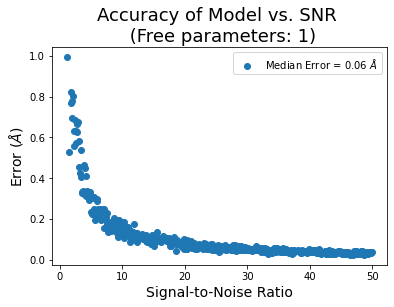

In [49]:
Accuracy(1,SNRs)

## 2d) Convert accuracy in angs to km/s for 2b and 2c (using non-relativistic Doppler Eqn.)
### $\lambda^{\prime}=\lambda_{0}\left(1+\frac{v}{c_{0}}\right)$ --> $v=c_0\left(\frac{\lambda^{\prime}}{\lambda_{0}}-1\right)$

11 out of 490 trials had accuracy > 1


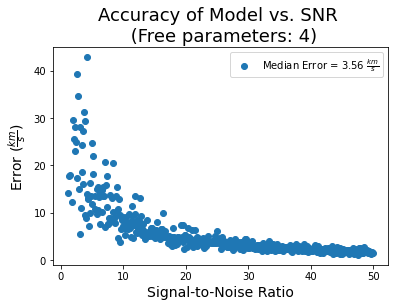

In [51]:
Accuracy(4,SNRs,'km/s')

7 out of 490 trials had accuracy > 1


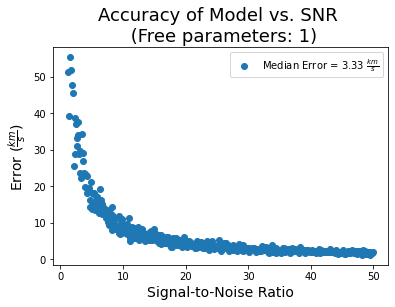

In [52]:
Accuracy(1,SNRs,'km/s')

### Models agree much better for data sets with higher SNR. Once SNR > 30, model doesn't fit significantly better if SNR keeps getting better (increasing). Models also agree better when you fit less free parameters (less deviation this way)

## 3) What mass planet could you detect if you have $N=10^1,10^2,10^3$ absorption lines? Remember that accuracy improves as $\sqrt{N}$ (so $\frac{accuracy}{\sqrt{N}}$)

### For $N=10$: $\sqrt{10}\approx 3.16$ --> $acc. \approx 1.10 \frac{km}{s}=1110 \frac{m}{s}$ --> detect $M_{p}> 10^{28.5} kg\approx 16.6 M_{Jup}$
### For $N=10^2$: $\sqrt{10^2}= 10$ --> $acc. \approx 0.34 \frac{km}{s}=340 \frac{m}{s}$ --> detect $M_{p}>10^{28} kg\approx 5.26 M_{Jup}$
### For $N=10^3$: $\sqrt{10^3}\approx 31.6$ --> $acc. \approx 0.10 \frac{km}{s}=100\frac{m}{s}$ --> detect $M_{p}>10^{27.5} kg\approx 1.66 M_{Jup}$

# 3) Plot of orbital inclination vs. semi-major axis with lines corresponding to grazing transit for planets from Earth to Jupiter-size. Also shading approx. habitable zone.

## 3a) M0V (dwarf) Host Star: $T_{eff}=3870K$ 

## 3b) K0III (giant) Host Star: $T_{eff}=4810K$ 
### (http://www.not.iac.es/instruments/notcam/ReferenceInfo/temp.html)

# 4) Simulate a star as a solid face-on disk by breaking the stellar surface into a grid of 1000x1000 square pixels

## 4a) Assign each pixel a surface brightness with 1.0 at the center. Use quadratic limb darkening tables-Van Hamme (1993)-to assign a relative brightness to other pixels. Assume G2V star with $T_{eff}=5500K$ and $\lambda_{obs}=5000$ angs
### Van Hamme (1993): https://ui.adsabs.harvard.edu/abs/1993AJ....106.2096V/abstract
### Source for log(g) of dwarf (V) stars: http://www.astro.sunysb.edu/metchev/PHY521/lecture2.pdf

## Q.L.D.: $I(\mu)=I(0)\left[1-a(1-\mu)-b(1-\mu)^2\right]$
## Substituting for $\mu$: $I(\mu)=I(0)\left[1-a\left(1-\sqrt{\frac{R_{*}^2-r^2}{R_{*}^2}}\right)-b\left(1-\sqrt{\frac{R_{*}^2-r^2}{R_{*}^2}}\right)^2\right]$ where $a$ is the radius of the disc and $r$ is the distance from the center of the disc (guidance from http://orca.phys.uvic.ca/~tatum/stellatm/atm6.pdf)
## I'm sourcing $a$ and $b$ from Table 5 on the 10th page of Wade & Rucinski (1985): http://articles.adsabs.harvard.edu/pdf/1985A%26AS...60..471W

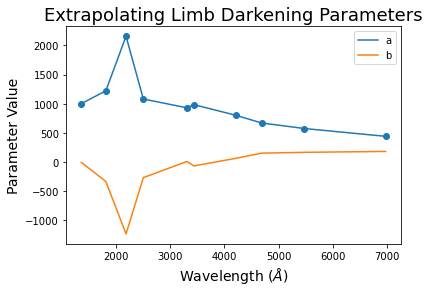

In [57]:
# We're using 5000 angstroms so this is my attempt to extrapolate proper a and b values
lambdas = [1362,1815,2187,2506,3312,3437,4212,4687,5475,6975]
a_list = [1002,1222,2157,1082,930,985,803,671,576,442]
b_list = [-3,-332,-1230,-266,11,-65,65,154,168,183]
plt.plot(lambdas,a_list,label='a')
plt.plot(lambdas,b_list,label='b')
plt.scatter(lambdas,a_list)
plt.xlabel(r'Wavelength ($\AA$)',fontsize=14)
plt.ylabel('Parameter Value',fontsize=14)
plt.title('Extrapolating Limb Darkening Parameters',fontsize=18)
plt.legend()

### In range of 5000 angs., the relationship for both parameters seems pretty linear so I'll use a linear extrapolation to find a and b at 5000 angs

In [58]:
# List indexes of lambdas that lie above and below 5000 angs.
min_index = 7
max_index = 8

# Define sublists of points below and above point of interest
a_sub = [a_list[min_index],a_list[max_index]]
b_sub = [b_list[min_index],b_list[max_index]]
lambdas_sub = [lambdas[min_index],lambdas[max_index]]

# Interpolate to find proper values at 5000 angs
a_new = np.interp(5000,lambdas_sub,a_sub)
b_new = np.interp(5000,lambdas_sub,b_sub)
print(a_new,b_new)

633.2652284263959 159.56091370558374


/d/users/jimmy/Documents/ASTR5490/HW3/LimbDarkening.py:35: RuntimeWarning: invalid value encountered in sqrt
  mu = np.sqrt(1-abs(r**2/R_star**2))


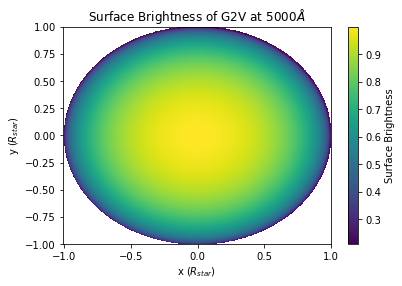

In [59]:
# Use LimbDarkening function to plot surface of G2V star
star = LimbDarkening(633.27/1000,159.56/1000)
star.QuadIntensity(0.2,0.2)
star.StarVisualize(1000)